DATA ANALYSE: Predict H1N1 and Seasonal Flu Vaccines

The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu
vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one
for seasonal_vaccine

This is a practice competition designed to be accessible to participants at all levels. That makes it a great place to dive into the world of data science competitions. Come on in from the waiting room and try your (hopefully steady) hand at predicting vaccinations.

Link:https://www.drivendata.org/competitions/66/flu-shot-learning/

In [12]:
# LogisticRegression(Randomized Search) : 0.7958
# XGBoost(Randomized Search): 0.8311
# LigthGBM(Randomized Search) : 0.8344
# Catboost(Randomized Search) : 0.8591
# Catboost(Optuna) score: 0.8546

install python packages

In [13]:
!pip install xgboost
!pip install catboost
!pip install lightgbm

import python packages

In [14]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import *
from catboost import Pool, cv


Data preprocessing stage

In [15]:
# read dataset
df_features = pd.read_csv('training_set_features.csv')
print(df_features.shape)

# fill all columns with 0
df_features.fillna(0,inplace = True)
df_features

(26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,Not Married,Own,0,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


Merge datasets

In [16]:
df_y_labels = pd.read_csv('training_set_labels.csv')
df = pd.merge(df_features,df_y_labels,left_on='respondent_id',right_on='respondent_id',how='left',copy=True)
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,0,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,0,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [17]:
df_features = df.copy()
df_features = df_features.drop(['respondent_id','h1n1_vaccine','seasonal_vaccine'], axis=1)
df_features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,Not Married,Own,0,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


Data Transformation and Dataset Splitting

In [18]:
df_x = df_features
df_y1 = df['h1n1_vaccine']
df_y2 = df['seasonal_vaccine']

df_test = pd.read_csv('test_set_features.csv')
df_test.fillna(0,inplace=True)
ids = df_test['respondent_id']
df_test = df_test.drop(['respondent_id'], axis=1)

In [19]:
x1_train,x1_test,y1_train,y1_test = train_test_split(df_x,df_y1,test_size=0.2,random_state=1)
x2_train,x2_test,y2_train,y2_test = train_test_split(df_x,df_y2,test_size=0.2,random_state=1)

In [20]:
!pip install pandas==1.4.4
!pip install optuna

1. CatBoost + optuna (Yi Yuan)  score: 0.8546

In [21]:
accuracys=[]
auc_scores=[]
ExecutionTimes = []

# Get the feature type of the training dataset
categorical_features = np.where(df_features.dtypes!=np.float)[0]
np.where(df_features.dtypes != np.float)[0]

# Get the column index of the categorical feature
categorical_features_indices = np.where(df_test.columns.isin(categorical_features))[0]


/var/folders/l2/xwxvpr1503q4wdlp12wg5pn00000gn/T/ipykernel_74213/1603052647.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = np.where(df_features.dtypes!=np.float)[0]
/var/folders/l2/xwxvpr1503q4wdlp12wg5pn00000gn/T/ipykernel_74213/1603052647.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.where(df_feature

model1 for h1n1_vaccine
Divide training set and test set

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna.integration.sklearn
import optuna
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier, Pool

# model1: Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y1, test_size=0.2, random_state=42)

train_dataset_se = Pool(data=X_train,
                     label=y_train,
                     cat_features = categorical_features)

This part of finding the best parameters takes a long time to run, so comment it out, and continue to train the model based on the best parameters that have been obtained.

In [23]:

# # Define the CatBoost model and convert the data to Pool format
# def objective(trial):
#     params = {
#     'iterations':trial.suggest_categorical('iterations', [100,200,300,500,1000,1200,1500]),
#     'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
#     'depth': trial.suggest_int("max_depth", 2,11),
#     'l2_leaf_reg': trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
#     'random_strength':trial.suggest_int("random_strength", 1,20),
#     'bagging_temperature':trial.suggest_int("bagging_temperature", 0,20),
#     'max_bin':trial.suggest_categorical('max_bin', [2,3,4,5,6,7,8,9,10,20,30]),
#     'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
#     'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
#     'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
#     'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
#     'od_type' : "Iter",
#     'od_wait' : 100,
#     'eval_metric': 'AUC',
#     "loss_function": "Logloss",
#     }

#     scores = cv(train_dataset_se,
#             params,
#             fold_count=5, 
#             early_stopping_rounds=10,         
#             plot=False, verbose=False)

#     return scores['test-AUC-mean'].max()

# print('Start Fit Model')
# startFitModel = datetime.now()
# sampler = optuna.samplers.TPESampler(seed=42)  # Make the sampler behave in a deterministic way.
# study = optuna.create_study(direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=100)

# # Output optimal hyperparameters
# print('Best params: ',study.best_params)

# model = CatBoostClassifier(**study.best_params,cat_features=categorical_features,verbose=False,random_seed=42)
# model.fit(X_train, y_train, cat_features=categorical_features)
# stopFitModel = datetime.now()
# print('End Fit Model')

# best_model1 = model

To save running time, the following are the best parameters obtained and used for model training

In [24]:

best_params = {'iterations': 500, 
               'learning_rate': 0.2556451053903671, 
               'max_depth': 5, 
               'l2_leaf_reg': 84.02787623570313, 
               'random_strength': 3, 
               'bagging_temperature': 20, 
               'max_bin': 7, 
               'min_data_in_leaf': 7, 
               'one_hot_max_size': 100, 
               'grow_policy': 'SymmetricTree', 
               'auto_class_weights': 'SqrtBalanced'}

# Train the model with optimal hyperparameters and make predictions
model = CatBoostClassifier(**best_params,cat_features=categorical_features,verbose=False,random_seed=42)
model.fit(X_train, y_train, cat_features=categorical_features)
y_pred = model.predict(X_test)
stopFitModel = datetime.now()
print('End Fit Model')
best_model1 = model

# Predict using the best model
y_pred = best_model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
auc_score = roc_auc_score(y_test, y_pred)
print('The auc score is:', auc_score)
accuracys.append(accuracy)
auc_scores.append(auc_score)

End Fit Model
Accuracy: 0.8371396480718832
The auc score is: 0.7562077166796931


Visualize the relationship between the TPR FPR of Model1 for seasonal_vaccine

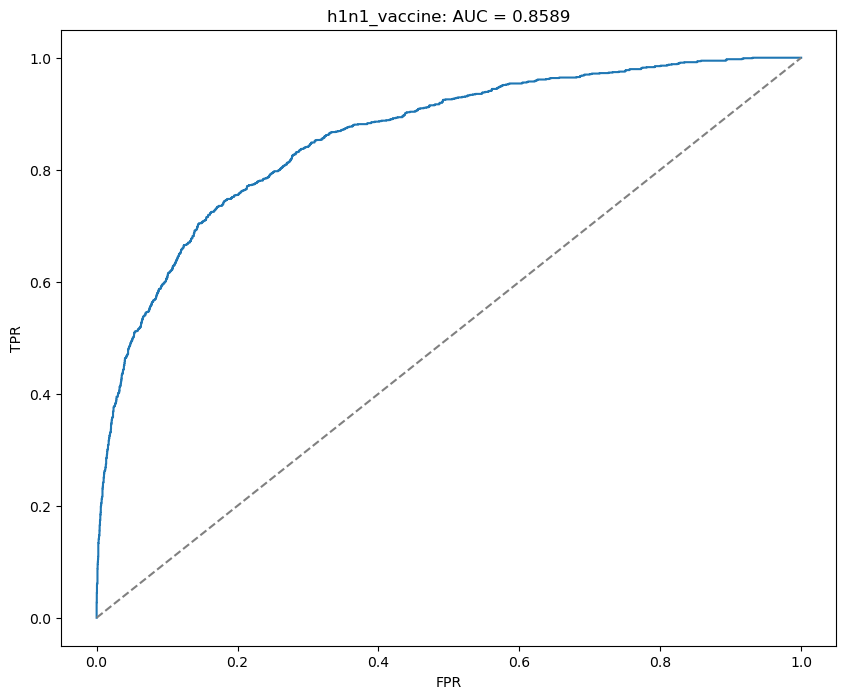

In [25]:
# TPR stands for True Positive Rate and FPR stands for False Positive Rate
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )
    
predictions_h1 = best_model1.predict_proba(X_test)
predictions_h1 = predictions_h1[:,1].reshape(-1,1)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test, 
    predictions_h1, 
    'h1n1_vaccine',
    ax=ax
)

model2 for seasonal_vaccine
Divide training set and test set

In [26]:
# model2: Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y2, test_size=0.2, random_state=42)

train_dataset_se = Pool(data=X_train,
                     label=y_train,
                     cat_features = categorical_features)

This part of finding the best parameters takes a long time to run, so comment it out, and continue to train the model based on the best parameters that have been obtained.

In [27]:
# # Define CatBoost mode
# def objective(trial):
#     params = {
#     'iterations':trial.suggest_categorical('iterations', [100,200,300,500,1000,1200,1500]),
#     'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
#     'depth': trial.suggest_int("max_depth", 2,11),
#     'l2_leaf_reg': trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
#     'random_strength':trial.suggest_int("random_strength", 1,20),
#     'bagging_temperature':trial.suggest_int("bagging_temperature", 1,20),
#     'max_bin':trial.suggest_categorical('max_bin', [2,3,4,5,6,7,8,9,10,20,30]),
#     'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
#     'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
#     'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
#     'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
#     'od_type' : "Iter",
#     'od_wait' : 100,
#     'eval_metric': 'AUC',
#     "loss_function": "Logloss",
#     }
    
#     scores = cv(train_dataset_se,
#         params,
#         fold_count=5, 
#         early_stopping_rounds=10,         
#         plot=False, verbose=False)
#     return scores['test-AUC-mean'].max()

# print('Start Fit Model')
# startFitModel = datetime.now()
# sampler = optuna.samplers.TPESampler(seed=42)  # Make the sampler behave in a deterministic way.

# study = optuna.create_study(direction='maximize',sampler=sampler)
# study.optimize(objective, n_trials=100)

# print('Best params: ',study.best_params)

# # Train the model with optimal hyperparameters and make predictions
# model = CatBoostClassifier(**study.best_params,cat_features=categorical_features,verbose=False,random_seed=42)
# model.fit(X_train, y_train, cat_features=categorical_features)
# stopFitModel = datetime.now()
# print('End Fit Model')

# best_model2 = model

To save running time, the following are the best parameters obtained and used for model training

In [28]:

best_params={'iterations': 1000, 
             'learning_rate': 0.03820603551691427, 
             'max_depth': 9, 
             'l2_leaf_reg': 22.075590555263226, 
             'random_strength': 3, 
             'bagging_temperature': 6, 
             'max_bin': 5, 
             'min_data_in_leaf': 4, 
             'one_hot_max_size': 1024, 
             'grow_policy': 'Lossguide', 
             'auto_class_weights': 'Balanced'}

# Train the model with optimal hyperparameters and make predictions
model = CatBoostClassifier(**best_params,cat_features=categorical_features,verbose=False,random_seed=42)
model.fit(X_train, y_train, cat_features=categorical_features)
stopFitModel = datetime.now()
print('End Fit Model')
best_model2 = model

# Predict using the best model
y_pred = best_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

auc_score = roc_auc_score(y_test, y_pred)
print('The auc score: ', auc_score)
accuracys.append(accuracy)
auc_scores.append(auc_score)
res = pd.DataFrame()
res["Accuracy Score"]= list(accuracys)
res["Auc Score"]= list(auc_scores)
res

End Fit Model
Accuracy:  0.7895919131411456
The auc score:  0.7889619594907649


,Accuracy Score,Auc Score
0,0.837140,0.756208
1,0.789592,0.788962


Visualize the relationship between the TPR FPR of Model2 for seasonal_vaccine

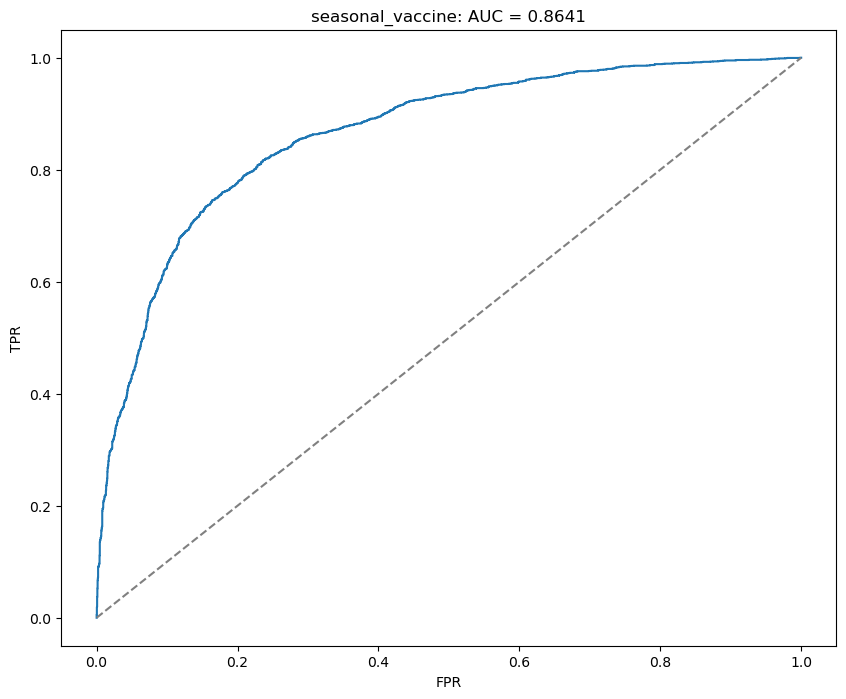

In [29]:
predictions_se = best_model2.predict_proba(X_test)
predictions_se = predictions_se[:,1].reshape(-1,1)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test, 
    predictions_se, 
    'seasonal_vaccine',
    ax=ax
)

Merge forecast data and export to excel

In [30]:
# Merge forecast data and export to excel
df_y1 = best_model1.predict_proba(df_test)
df_res1 = pd.DataFrame(df_y1)

df_y2 = best_model2.predict_proba(df_test)
df_res2 = pd.DataFrame(df_y2)
df_res2

df_res = pd.DataFrame()
df_res["respondent_id"]= list(ids)
df_res["h1n1_vaccine"]= list(df_res1[1])
df_res["seasonal_vaccine"]= list(df_res2[1])
df_res.to_csv('CatBoost_optuna_resul_new.csv', index=False)
df_res

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.139254,0.231751
1,26708,0.050185,0.042837
2,26709,0.106294,0.590749
3,26710,0.862953,0.910276
4,26711,0.462045,0.530009
...,...,...,...
26703,53410,0.511791,0.493935
26704,53411,0.245704,0.282719
26705,53412,0.208839,0.192049
26706,53413,0.016353,0.304296


In [31]:
# score：0.8546

In [32]:
# Catboost(Optuna) score: 0.8546

2. CatBoost + Randomized Search Cross Validation(Yi Yuan)   score: 0.8591 

In [24]:
 !pip install pandas==1.4.4

In [25]:
# Get the feature type of the training dataset
categorical_features_indices = np.where(df_features.dtypes!=np.float)[0]

/var/folders/l2/xwxvpr1503q4wdlp12wg5pn00000gn/T/ipykernel_62652/2674798540.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(df_features.dtypes!=np.float)[0]


create CatBoost model

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import *

# create CatBoostClassifier object
model=CatBoostClassifier(
    loss_function='Logloss',
    cat_features=categorical_features_indices,
    iterations=1000,
    learning_rate=0.01,
    depth=10,
    l2_leaf_reg=1,
    bagging_temperature=1,
    random_strength=1,
    verbose=False
)

Use RandomizedSearchCV to get the best parameters and train the best model for h1n1_vaccine

In [27]:
# Define the range of parameters to search

param_dist = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'depth': range(3, 11),
    'l2_leaf_reg': range(1, 10),
}

# Create RandomizedSearchCV object and search
print("Start RandomizedSearchCV")
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=20, n_jobs=-1)
print("End RandomizedSearchCV")

print("Start fit model ")
random_search.fit(x1_train, y1_train,cat_features = categorical_features_indices,eval_set=(x1_test,y1_test),plot=True)
print("End fit model ")

# Output the best parameter combination and accuracy
print("Best parameters: ", random_search.best_params_)
print("Best accuracy: {:.2f}%".format(random_search.best_score_ * 100))

best_model1 = random_search
y_pred = best_model1.predict(x1_test)
accuracy = accuracy_score(y1_test, y_pred)
print('Accuracy:', accuracy)

Start RandomizedSearchCV
End RandomizedSearchCV
Start fit model 


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

End fit model 
Best parameters:  {'learning_rate': 0.1, 'l2_leaf_reg': 6, 'iterations': 500, 'depth': 6}
Best accuracy: 85.63%
Accuracy: 0.858292774241857


To save running time, the following are the best parameters obtained and used for model training

In [28]:
# model=CatBoostClassifier(
#     loss_function='Logloss',
#     cat_features=categorical_features_indices,
#     iterations=1000,
#     learning_rate=0.05,
#     depth=4,
#     l2_leaf_reg=3,
#     bagging_temperature=1,
#     random_strength=1,
#     verbose=False
# )
# model.fit(x1_train, y1_train, cat_features=categorical_features_indices)
# best_model1 = model


# # use the best model to predict the data
# y_pred = best_model1.predict(x1_test)
# accuracy = accuracy_score(y1_test, y_pred)
# print('Accuracy:', accuracy)



Use RandomizedSearchCV to get the best parameters and train the best model for seasonal_vaccine

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the range of parameters to search

param_dist = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'depth': range(3, 11),
    'l2_leaf_reg': range(1, 10),
}

# Create RandomizedSearchCV object and search
print("Start RandomizedSearchCV")
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=20, n_jobs=-1)
print("End RandomizedSearchCV")

print("Start fit model ")
random_search.fit(x2_train, y2_train,cat_features = categorical_features_indices,eval_set=(x2_test,y2_test),plot=True)
print("End fit model ")

# Output the best parameter combination and accuracy
print("Best parameters: ", random_search.best_params_)
print("Best accuracy: {:.2f}%".format(random_search.best_score_ * 100))


best_model2 = random_search
y_pred = best_model2.predict(x2_test)
accuracy = accuracy_score(y2_test, y_pred)
print('Accuracy:', accuracy)

Start RandomizedSearchCV
End RandomizedSearchCV
Start fit model 
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=L

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

End fit model 
Best parameters:  {'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 4}
Best accuracy: 78.61%
Accuracy: 0.7944590041183077


To save running time, the following are the best parameters obtained and used for model training

In [30]:
# # Best parameters:  {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 2000, 'depth': 5}
# model=CatBoostClassifier(
#     loss_function='Logloss',
#     cat_features=categorical_features_indices,
#     iterations=2000,
#     learning_rate=0.05,
#     depth=5,
#     l2_leaf_reg=3,
#     bagging_temperature=1,
#     random_strength=1,
#     verbose=False
# )
# model.fit(x2_train, y2_train, cat_features=categorical_features_indices)
# best_model2 = model


# # use the best model to predict the data
# y_pred = best_model2.predict(x2_test)
# accuracy = accuracy_score(y2_test, y_pred)
# print('Accuracy:', accuracy)




In [31]:
# best_model prediction
df_y1 = best_model1.predict_proba(df_test)
df_res1 = pd.DataFrame(df_y1)
df_y2 = best_model2.predict_proba(df_test)
df_res2 = pd.DataFrame(df_y2)

# Export prediction file
df_res = pd.DataFrame()
df_res["respondent_id"]= list(ids)
df_res["h1n1_vaccine"]= list(df_res1[1])
df_res["seasonal_vaccine"]= list(df_res2[1])
df_res.to_csv('CatBoost_Random.csv', index=False)
df_res

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.153381,0.210235
1,26708,0.016191,0.038347
2,26709,0.194832,0.712378
3,26710,0.643479,0.894273
4,26711,0.348701,0.505176
...,...,...,...
26703,53410,0.320435,0.440783
26704,53411,0.119236,0.353378
26705,53412,0.182430,0.243211
26706,53413,0.018175,0.275392


In [32]:
# Catboost(Randomized Search) score: 0.8591 

The following is the method that needs to be preprocessed（Yi Yuan）
Method: XGBoost,LigthBGM,LogisticRegression

Data Preprocessing

In [3]:
# read dataset
df_features = pd.read_csv('training_set_features.csv')
# Dealing with duplicates
df_features[df_features.duplicated(keep=False)]
print(df_features.shape)
df_features[df_features.isna().any(axis=1)]
# drop columns
df_features = df_features.drop(['hhs_geo_region','employment_industry','employment_occupation'], axis=1)
df_features = df_features.dropna(thresh=32).copy()  # drop rows that have less than 32 non-NaN


(26707, 36)


data type conversion

In [4]:
# data conversion
df_features.loc[df_features['age_group'] == '18 - 34 Years', 'age_group'] = 0
df_features.loc[df_features['age_group'] == '35 - 44 Years', 'age_group'] = 1
df_features.loc[df_features['age_group'] == '45 - 54 Years', 'age_group'] = 2
df_features.loc[df_features['age_group'] == '55 - 64 Years', 'age_group'] = 3
df_features.loc[df_features['age_group'] == '65+ Years', 'age_group'] = 4

df_features.loc[df_features['education'] == '< 12 Years', 'education'] = 0
df_features.loc[df_features['education'] == '12 Years', 'education'] = 1
df_features.loc[df_features['education'] == 'Some College', 'education'] = 2
df_features.loc[df_features['education'] == 'College Graduate', 'education'] = 3

df_features.loc[df_features['income_poverty'] == 'Below Poverty', 'income_poverty'] = 0
df_features.loc[df_features['income_poverty'] == '<= $75,000, Above Poverty', 'income_poverty'] = 1
df_features.loc[df_features['income_poverty'] == '> $75,000', 'income_poverty'] = 2

df_features.loc[df_features['sex'] == 'Male', 'sex'] = 0
df_features.loc[df_features['sex'] == 'Female', 'sex'] = 1

df_features.loc[df_features['race'] == 'White', 'race'] = 0
df_features.loc[df_features['race'] == 'Black', 'race'] = 1
df_features.loc[df_features['race'] == 'Other or Multiple', 'race'] = 2
df_features.loc[df_features['race'] == 'Hispanic', 'race'] = 3

df_features.loc[df_features['marital_status'] == 'Not Married', 'marital_status'] = 0
df_features.loc[df_features['marital_status'] == 'Married', 'marital_status'] = 1

df_features.loc[df_features['rent_or_own'] == 'Own', 'rent_or_own'] = 0
df_features.loc[df_features['rent_or_own'] == 'Rent', 'rent_or_own'] = 1

df_features.loc[df_features['employment_status'] == 'Not in Labor Force', 'employment_status'] = 0
df_features.loc[df_features['employment_status'] == 'Employed', 'employment_status'] = 1
df_features.loc[df_features['employment_status'] == 'Unemployed', 'employment_status'] = 2

df_features.loc[df_features['census_msa'] == 'Non-MSA', 'census_msa'] = 0
df_features.loc[df_features['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 1
df_features.loc[df_features['census_msa'] == 'MSA, Principle City', 'census_msa'] = 2

# convert object to float
df_features['age_group'] = df_features['age_group'].astype(float)
df_features['education'] = df_features['education'].astype(float)
df_features['race'] = df_features['race'].astype(float)
df_features['sex'] = df_features['sex'].astype(float)
df_features['income_poverty'] = df_features['income_poverty'].astype(float)
df_features['marital_status'] = df_features['marital_status'].astype(float)
df_features['rent_or_own'] = df_features['rent_or_own'].astype(float)
df_features['employment_status'] = df_features['employment_status'].astype(float)
df_features['census_msa'] = df_features['census_msa'].astype(float)

# Forward filling method to supplement empty data
df_features.fillna(method='ffill',inplace=True)


Processing and Transformation of Test Data

In [5]:
df_test = pd.read_csv('test_set_features.csv')
df_test = df_test.drop(['hhs_geo_region','employment_industry','employment_occupation'], axis=1)

In [6]:
# data conversion

df_test.loc[df_test['age_group'] == '18 - 34 Years', 'age_group'] = 0
df_test.loc[df_test['age_group'] == '35 - 44 Years', 'age_group'] = 1
df_test.loc[df_test['age_group'] == '45 - 54 Years', 'age_group'] = 2
df_test.loc[df_test['age_group'] == '55 - 64 Years', 'age_group'] = 3
df_test.loc[df_test['age_group'] == '65+ Years', 'age_group'] = 4

df_test.loc[df_test['education'] == '< 12 Years', 'education'] = 0
df_test.loc[df_test['education'] == '12 Years', 'education'] = 1
df_test.loc[df_test['education'] == 'Some College', 'education'] = 2
df_test.loc[df_test['education'] == 'College Graduate', 'education'] = 3

df_test.loc[df_test['income_poverty'] == 'Below Poverty', 'income_poverty'] = 0
df_test.loc[df_test['income_poverty'] == '<= $75,000, Above Poverty', 'income_poverty'] = 1
df_test.loc[df_test['income_poverty'] == '> $75,000', 'income_poverty'] = 2

df_test.loc[df_test['sex'] == 'Male', 'sex'] = 0
df_test.loc[df_test['sex'] == 'Female', 'sex'] = 1

df_test.loc[df_test['race'] == 'White', 'race'] = 0
df_test.loc[df_test['race'] == 'Black', 'race'] = 1
df_test.loc[df_test['race'] == 'Other or Multiple', 'race'] = 2
df_test.loc[df_test['race'] == 'Hispanic', 'race'] = 3


df_test.loc[df_test['marital_status'] == 'Not Married', 'marital_status'] = 0
df_test.loc[df_test['marital_status'] == 'Married', 'marital_status'] = 1

df_test.loc[df_test['rent_or_own'] == 'Own', 'rent_or_own'] = 0
df_test.loc[df_test['rent_or_own'] == 'Rent', 'rent_or_own'] = 1

df_test.loc[df_test['employment_status'] == 'Not in Labor Force', 'employment_status'] = 0
df_test.loc[df_test['employment_status'] == 'Employed', 'employment_status'] = 1
df_test.loc[df_test['employment_status'] == 'Unemployed', 'employment_status'] = 2

df_test.loc[df_test['census_msa'] == 'Non-MSA', 'census_msa'] = 0
df_test.loc[df_test['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 1
df_test.loc[df_test['census_msa'] == 'MSA, Principle City', 'census_msa'] = 2

# Forward filling method to supplement empty data
df_test.fillna(method='ffill',inplace=True)

In [7]:
# Processed data assignment
df_y_labels = pd.read_csv('training_set_labels.csv')
total_table = pd.merge(df_features,df_y_labels,left_on='respondent_id',right_on='respondent_id',how='left',copy=True)
df_y = total_table[['h1n1_vaccine','seasonal_vaccine']]
x = df_features
y1 = df_y['h1n1_vaccine']
y2 = df_y['seasonal_vaccine']

3. LigthBGM + Randomized Search Cross Validation score: 0.8311

In [38]:
pip install scikit-learn==1.1.3

Note: you may need to restart the kernel to use updated packages.


training model1 for h1n1_vaccine

In [39]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Divide the data set into training set and test set
X_train,X_test,y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=1)
# Define the range of parameters to search
param_dist = {
    'num_leaves': [31, 50, 75, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': range(3, 11),
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': range(1, 10),
    'reg_lambda': range(1, 10),
    'n_estimators': [100, 500, 1000, 2000],
    'objective': ['regression']
}

# LightGBM
lgb_model = lgb.LGBMRegressor()
# Use RandomizedSearchCV for random search tuning
rand_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist, cv=5, n_iter=100, 
                                 scoring='neg_mean_squared_error', n_jobs=-1, random_state=42,verbose=1)

# Fit the model and output the best parameters and best score
rand_search.fit(X_train, y_train,verbose=False)
print('Best Parameters:', rand_search.best_params_)
print('Best Score:', rand_search.best_score_)

# Redefine the model with the best parameters
best_lgb_model = lgb.LGBMRegressor(**rand_search.best_params_)
best_lgb_model.fit(X_train, y_train)
test_score = best_lgb_model.score(X_test, y_test)
print('Test Score:', test_score)

best_model1 = best_lgb_model
y_pred = best_model1.predict(X_test)
print('The auc score :', roc_auc_score(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/yuanyi/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(lay

training model2 for seasonal_vaccine

In [40]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Divide the data set into training set and test set
X_train,X_test,y_train,y_test = train_test_split(x,y2,test_size=0.2,random_state=1)

# Define the range of parameters to search
param_dist = {
    'num_leaves': [31, 50, 75, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': range(3, 11),
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': range(1, 10),
    'reg_lambda': range(1, 10),
    'n_estimators': [100, 500, 1000, 2000],
    'objective': ['regression']
}

# LightGBM
lgb_model = lgb.LGBMRegressor()

# Use RandomizedSearchCV for random search tuning
rand_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist, cv=5, n_iter=100, 
                                 scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit the model and output the best parameters and best score
rand_search.fit(X_train, y_train)
print('Best Parameters:', rand_search.best_params_)
print('Best Score:', rand_search.best_score_)

# Redefine the model with the best parameters
best_lgb_model = lgb.LGBMRegressor(**rand_search.best_params_)
best_lgb_model.fit(X_train, y_train)
test_score = best_lgb_model.score(X_test, y_test)
print('Test Score:', test_score)

best_model2 = best_lgb_model
y_pred = best_model2.predict(X_test)
print('The auc score:', roc_auc_score(y_test, y_pred))

Best Parameters: {'subsample': 0.9, 'reg_lambda': 4, 'reg_alpha': 3, 'objective': 'regression', 'num_leaves': 31, 'n_estimators': 1000, 'min_child_samples': 20, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best Score: -0.15135693397897368
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))
MetricVisualizer(layout=Layout(align_self=

In [41]:
# Merge forecast data and export excel form
df_y1 = best_model1.predict(df_test)
df_res1 = pd.DataFrame(df_y1)

df_y2 = best_model2.predict(df_test)
df_res2 = pd.DataFrame(df_y2)

df_res = pd.DataFrame()
df_res["respondent_id"]= list(df_test['respondent_id'])
df_res["h1n1_vaccine"]= list(df_res1[0])
df_res["seasonal_vaccine"]= list(df_res2[0])
df_res.to_csv('LightGBM_Random_result_features.csv', index=False)
df_res

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.126708,0.198770
1,26708,0.031204,-0.035290
2,26709,0.277838,0.727950
3,26710,0.635155,0.863768
4,26711,0.260271,0.466672
...,...,...,...
26703,53410,0.306574,0.393724
26704,53411,0.159467,0.292034
26705,53412,0.137605,0.174366
26706,53413,0.067665,0.424016


In [42]:
# LigthGBM score: 0.8311

 4. XGBoost + Randomized Search Cross Validation  score: 0.8334

In [8]:
# Divide the data set into training set and test set
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y1,test_size=0.3,random_state=1)
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y2,test_size=0.3,random_state=1)

training model1 for h1n1_vaccine

The accuracy is: 0.9291591410796709
The accuracy is: 0.8202247191011236
The confusion matrix result:
 [[4517  795]
 [ 357  739]]


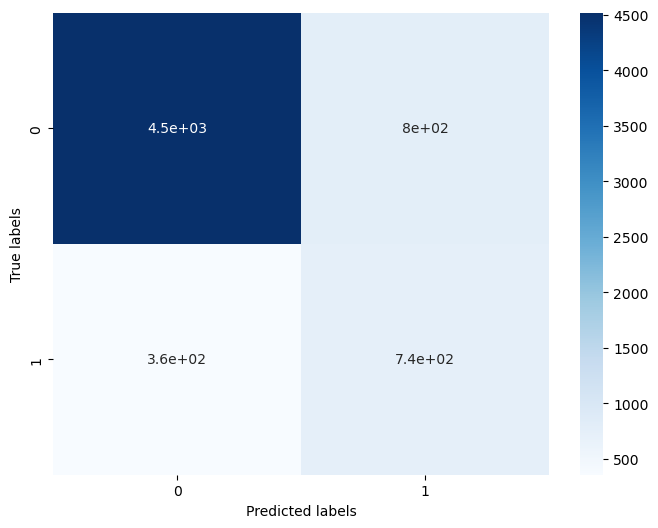

In [9]:
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

## Define the XGBoost model
model1 = XGBClassifier()
model1.fit(x1_train, y1_train)

## predict
train_predict = model1.predict(x1_train)
test_predict = model1.predict(x1_test)

## Use accuracy to evaluate model performance
print('The accuracy is:', metrics.accuracy_score(y1_train, train_predict))
print('The accuracy is:', metrics.accuracy_score(y1_test, test_predict))

## View confusion matrix
confusion_matrix_result = metrics.confusion_matrix(test_predict, y1_test)
print('The confusion matrix result:\n', confusion_matrix_result)

## Visualize the results with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


training model2 for seasonal_vaccine

The accuracy is: 0.8983878520302362
The accuracy is: 0.7740324594257179
The confusion matrix result:
 [[2609  769]
 [ 679 2351]]


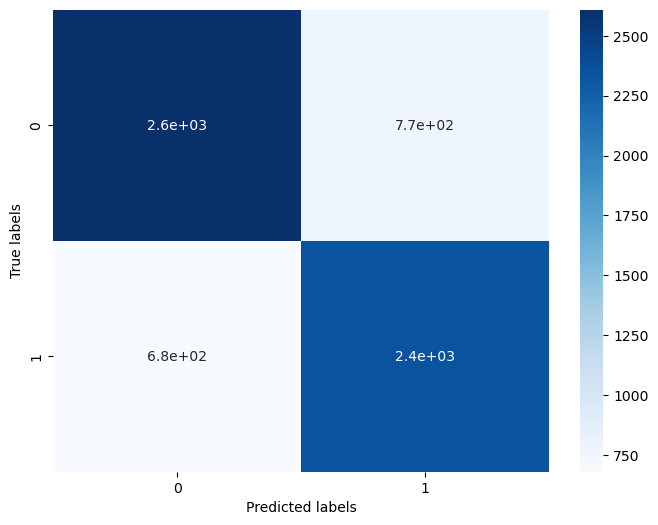

In [10]:
from xgboost.sklearn import XGBClassifier
from sklearn import metrics 

## Define the XGBoost model
model2 = XGBClassifier()
model2.fit(x2_train, y2_train)

train_predict = model2.predict(x2_train)
test_predict = model2.predict(x2_test)

## Use accuracy to evaluate model performance
print('The accuracy is:', metrics.accuracy_score(y2_train, train_predict))
print('The accuracy is:', metrics.accuracy_score(y2_test, test_predict))

## View confusion matrix
confusion_matrix_result = metrics.confusion_matrix(test_predict, y2_test)
print('The confusion matrix result:\n', confusion_matrix_result)

## Visualize the results with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [11]:
# Merge forecast data and export excel form
df_y1 = model1.predict_proba(df_test)
df_y2 = model2.predict_proba(df_test)

df_res1 = pd.DataFrame(df_y1)
df_res2 = pd.DataFrame(df_y2)

df_res = pd.DataFrame()
df_res["respondent_id"]= list(df_test['respondent_id'])
df_res["h1n1_vaccine"]= list(df_res1[1])
df_res["seasonal_vaccine"]= list(df_res2[1])
df_res.to_csv('XGBoost_result_features.csv', index=False)
df_res

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.011445,0.036659
1,26708,0.010326,0.007424
2,26709,0.365135,0.775275
3,26710,0.441858,0.237396
4,26711,0.133075,0.428024
...,...,...,...
26703,53410,0.141785,0.057633
26704,53411,0.019705,0.026518
26705,53412,0.051445,0.097570
26706,53413,0.007530,0.156862


In [47]:
# XGBoost score: 0.8334

5. LogisticRegression+Randomized Search Cross Validation   score: 0.7958

In [48]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x,y1, test_size=0.2, random_state=42)

# define the model
model = LogisticRegression()

# define parameter space
param_space = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# define random search
search = RandomizedSearchCV(model, param_distributions=param_space, n_iter=20, cv=5, random_state=42, n_jobs=-1)
search.fit(X_train, y_train)

# Output the best parameter combination and accuracy
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print("Best parameters: ", search.best_params_)
print("Best accuracy: {:.2f}%".format(search.best_score_ * 100))

# Retrain the model with the best parameters
best_model = LogisticRegression(C=search.best_params_['C'], penalty=search.best_params_['penalty'], 
                                 solver=search.best_params_['solver'])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
best_model1 = best_model

/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn

Best parameter (CV score=0.828):
Best parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 1438.44988828766}
Best accuracy: 82.80%
Accuracy: 0.8298220973782772


In [49]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x,y2, test_size=0.2, random_state=42)

# define the model
model = LogisticRegression()

param_space = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga']
}

# define random search
search = RandomizedSearchCV(model, param_distributions=param_space, n_iter=20, cv=5, random_state=42, n_jobs=-1)
search.fit(X_train, y_train)

# Output the best parameter combination and accuracy
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print("Best parameters: ", search.best_params_)
print("Best accuracy: {:.2f}%".format(search.best_score_ * 100))

# Retrain the model with the best parameters
best_model = LogisticRegression(C=search.best_params_['C'], penalty=search.best_params_['penalty'], 
                                 solver=search.best_params_['solver'])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
best_model2 = best_model

/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yuanyi/anaconda3/lib/python3.10/site-packages/sklearn

Best parameter (CV score=0.782):
Best parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 1438.44988828766}
Best accuracy: 78.17%
Accuracy: 0.7808988764044944


In [50]:
# Merge forecast data and export excel form
df_y1 = best_model1.predict_proba(df_test)
df_res1 = pd.DataFrame(df_y1)

df_y2 = best_model2.predict_proba(df_test)
df_res2 = pd.DataFrame(df_y2)

df_res = pd.DataFrame()
df_res["respondent_id"]= list(df_test['respondent_id'])
df_res["h1n1_vaccine"]= list(df_res1[1])
df_res["seasonal_vaccine"]= list(df_res2[1])
df_res.to_csv('LogisticRegression_Random_result_features.csv', index=False)
df_res

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.088038,0.246875
1,26708,0.033717,0.036832
2,26709,0.357806,0.682564
3,26710,0.500606,0.879234
4,26711,0.243155,0.521572
...,...,...,...
26703,53410,0.268723,0.406750
26704,53411,0.058263,0.225693
26705,53412,0.143590,0.199490
26706,53413,0.069599,0.419089


In [51]:
# LogisticRegression score: 0.7958

Data visualization
The following are all the methods we use and the corresponding accuracy, using the visualization diagram to show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


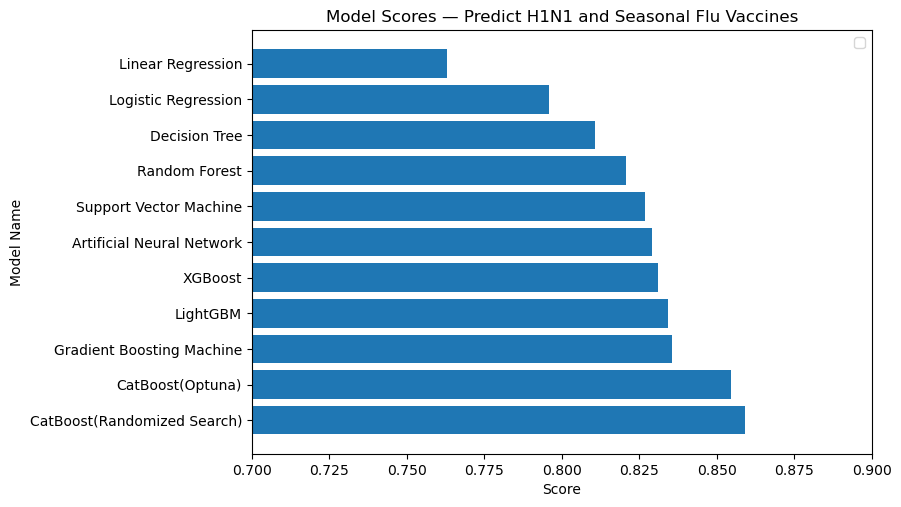

In [52]:
import matplotlib.pyplot as plt
# create model score dictionary
model_scores = {'Linear Regression': 0.7629,
                'Logistic Regression': 0.7958,
                'LightGBM': 0.8344,
                'XGBoost': 0.8311,
                'CatBoost(Optuna)': 0.8546,
                'CatBoost(Randomized Search)': 0.8591,
                'Artificial Neural Network': 0.8290,
                'Decision Tree': 0.8107,
                'Random Forest': 0.8208,
                'Support Vector Machine': 0.8267,
                'Gradient Boosting Machine': 0.8354
               }

model_types = {'Linear Regression': 'Single model',
                'Logistic Regression': 'Single model',
                'LightGBM': 'Ensemble model',
                'XGBoost': 'Ensemble model',
                'CatBoost(Optuna)': 'Ensemble model',
                'CatBoost(Randomized Search)': 'Ensemble model',
                'Artificial Neural Network': 'Single model',
                'Decision Tree': 'Single model',
                'Random Forest': 'Ensemble model',
                'Support Vector Machine': 'Single model',
                'Gradient Boosting Machine': 'Ensemble model',
               }

# Sort the dictionary by score
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

models = [x[0] for x in sorted_scores]
scores = [x[1] for x in sorted_scores]
types = list(model_types.values())

# Draw a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(models, scores, align='center')
      
# add title and label
ax.set_title('Model Scores — Predict H1N1 and Seasonal Flu Vaccines')
ax.set_xlabel('Score')
ax.set_ylabel('Model Name')
ax.set_xlim([0.7, 0.9])

# add legend
fig.set_size_inches(8, len(models) * 0.5)
ax.legend()
plt.show()


In [53]:
# LogisticRegression score: 0.7958
# Randomized Search:
# LigthGBM score: 0.8344
# XGBoost score: 0.8311
# Catboost score: 0.8591
# Catboost(Optuna) score: 0.8546